# <center> CCT College Dublin </center>

## <center> Assessment Cover Page</center>


<br><br><br>
---

<span style="font-size:larger;">

**Module Title:**&nbsp;&nbsp;&nbsp; Diploma in Predictive Analytics
	
**Assessment Title:**&nbsp;&nbsp;&nbsp;PDA FINAL PROJECT
	
**Lecturer Name:**&nbsp;&nbsp;&nbsp; Marina Iantorno
	
**Student Full Name:**&nbsp;&nbsp;&nbsp;Yumiko Maria Bejarano Azogue 
	
**Student Number:**&nbsp;&nbsp;&nbsp; 2024144
	
**Assessment Due Date:**&nbsp;&nbsp;&nbsp; 08/07/2024
	
**Date of Submission:**&nbsp;&nbsp;&nbsp; 15/08/2024
    
</span> 

<br><br><br>

---

#### Declaration 

```
By submitting this assessment, I confirm that I have read the CCT policy on Academic Misconduct and understand the implications of submitting work that is not my own or does not appropriately reference material taken from a third party or other source. I declare it to be my own work and that all material from third parties has been appropriately referenced. I further confirm that this work has not previously been submitted for assessment by myself or someone else in CCT College Dublin or any other higher education institution.
```
<br><br><br>

--- 

In [1]:
#Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings 
warnings.filterwarnings("ignore")


In [2]:
#Reading the dataset
dataset = pd.read_excel('Online Retail.xlsx', nrows = 10000)
dataset.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


## Data Loading and Exploration

In [3]:
# Exploratory Data Analysis (EDA)
print("\nDescriptive statistics of the dataset:")
dataset.describe().T


Descriptive statistics of the dataset:


,count,mean,min,25%,50%,75%,max,std
Quantity,10000.0,7.8286,-9360.0,1.0,2.0,8.0,2880.0,104.322417
InvoiceDate,10000,2010-12-03 05:58:26.346000128,2010-12-01 08:26:00,2010-12-01 17:06:00,2010-12-02 18:08:00,2010-12-05 10:45:00,2010-12-05 16:24:00,NaN
UnitPrice,10000.0,3.837412,0.0,1.25,2.51,4.21,887.52,14.310148
CustomerID,7709.0,15615.462576,12395.0,14388.0,15605.0,17228.0,18239.0,1756.540802


In [4]:
# Provide basic information about the dataset, including data types and the number of non-null values in each column.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    10000 non-null  object        
 1   StockCode    10000 non-null  object        
 2   Description  9958 non-null   object        
 3   Quantity     10000 non-null  int64         
 4   InvoiceDate  10000 non-null  datetime64[ns]
 5   UnitPrice    10000 non-null  float64       
 6   CustomerID   7709 non-null   float64       
 7   Country      10000 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 625.1+ KB


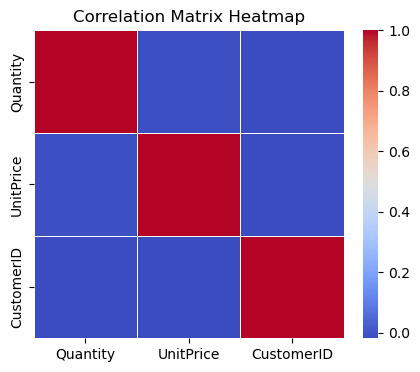

In [5]:
# Correlation Matrix
numeric_df = dataset.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(5, 4))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Missing Values Analysis

In [6]:
# Missing Values Analysis

# Identify missing values per column.
dataset.isnull().sum()

InvoiceNo         0
StockCode         0
Description      42
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     2291
Country           0
dtype: int64

### Data Cleaning

In [7]:
# Data Cleaning

# Remove rows with missing values in the `CustomerID` column, as it is necessary for creating the user matrix.
dataset.dropna(subset=['CustomerID'], inplace=True)

In [8]:
# Data Type Conversion

# Convert `CustomerID` to string to maintain consistency in the user matrix.
dataset['CustomerID'] = dataset['CustomerID'].astype(str)

In [9]:
# Data Filtering

# Filter data to ensure `Quantity` and `UnitPrice` are greater than 0, indicating a valid purchase.
dataset = dataset[(dataset['Quantity'] > 0) & (dataset['UnitPrice'] > 0)]

## Recommendation System

In [10]:
#  Creating the User-Item Matrix

# Create a pivot table representing the number of products purchased (`Quantity`) by each user (`CustomerID`), using `StockCode` as columns.
user_item_matrix = dataset.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', aggfunc='sum').fillna(0)


In [11]:
# Creating the User Similarity Matrix

# Calculate user similarity using cosine similarity and represent it in a DataFrame.
user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)


In [12]:
# User-Based Rating Prediction

# Define a function to predict ratings based on user similarity and the user-item matrix.
def predict_ratings_user_based(user_item_matrix, user_similarity):
    mean_user_rating = user_item_matrix.mean(axis=1).values
    ratings_diff = (user_item_matrix.values - mean_user_rating[:, np.newaxis])
    pred = mean_user_rating[:, np.newaxis] + user_similarity.dot(ratings_diff) / np.array([np.abs(user_similarity).sum(axis=1)]).T
    return pred

In [13]:
# Generate rating predictions.
user_predicted_ratings = predict_ratings_user_based(user_item_matrix, user_similarity)


In [14]:
# User-Based Model Evaluation

# Calculate the root mean square error (RMSE) to evaluate the prediction accuracy.
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

In [15]:
print("User-User Collaborative Filtering RMSE:", rmse(user_predicted_ratings, user_item_matrix.values))


User-User Collaborative Filtering RMSE: 39.793287722573005


User-User Collaborative Filtering RMSE: 39.793287722573005

In [16]:
# Creating the Item Similarity Matrix

# Calculate item similarity using cosine similarity and represent it in a DataFrame.
item_similarity = cosine_similarity(user_item_matrix.T)
item_similarity_df = pd.DataFrame(item_similarity, index=user_item_matrix.columns, columns=user_item_matrix.columns)


In [17]:
# Item-Based Rating Prediction

# Define a function to predict ratings based on item similarity and the user-item matrix.
def predict_ratings_item_based(user_item_matrix, item_similarity):
    pred = user_item_matrix.values.dot(item_similarity) / np.array([np.abs(item_similarity).sum(axis=1)])
    return pred

In [18]:
# Generate rating predictions.
item_predicted_ratings = predict_ratings_item_based(user_item_matrix, item_similarity)

In [19]:
# Item-Based Model Evaluation

# Calculate the RMSE to evaluate the prediction accuracy.
print("Item-Item Collaborative Filtering RMSE:", rmse(item_predicted_ratings, user_item_matrix.values))


Item-Item Collaborative Filtering RMSE: 36.930396816952


Item-Item Collaborative Filtering RMSE: 36.930396816952

In [20]:
# Normalization and Singular Value Decomposition (SVD)

# To improve recommendation accuracy, we normalize the data and apply singular value decomposition (SVD).
from scipy.sparse.linalg import svds

In [21]:
# Normalize the user-item matrix
user_ratings_mean = np.mean(user_item_matrix.values, axis=1)
ratings_demeaned = user_item_matrix.values - user_ratings_mean.reshape(-1, 1)

In [22]:
# Apply SVD
U, sigma, Vt = svds(ratings_demeaned, k=50)
sigma = np.diag(sigma)

In [23]:
# Predict ratings using SVD.
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
predicted_ratings_df = pd.DataFrame(all_user_predicted_ratings, columns=user_item_matrix.columns)


In [24]:
# SVD Model Evaluation

# Calculate the RMSE to evaluate the accuracy of the SVD-based model.
print("SVD Collaborative Filtering RMSE:", rmse(predicted_ratings_df.values, user_item_matrix.values))


SVD Collaborative Filtering RMSE: 7.270497521339722


SVD Collaborative Filtering RMSE: 7.270497521339722

In [25]:
# Item Recommendation

# Define a function to recommend items to a given user based on the predicted ratings.
def recommend_items(user_id, user_item_matrix, predicted_ratings_df, num_recommendations=5):
    user_idx = user_item_matrix.index.get_loc(user_id)
    sorted_user_ratings = predicted_ratings_df.iloc[user_idx].sort_values(ascending=False)
    user_data = user_item_matrix.loc[user_id]
    user_full = (user_data[user_data > 0]).sort_values(ascending=False)
    recommendations = sorted_user_ratings[~sorted_user_ratings.index.isin(user_full.index)]
    return recommendations.head(num_recommendations)

In [26]:
# Select a random user to generate recommendations.
random_user_index = np.random.choice(user_item_matrix.index)
recommendations = recommend_items(random_user_index, user_item_matrix, predicted_ratings_df, num_recommendations=5)


In [27]:
customer_id = random_user_index
print("Recommendations for customer ID:", customer_id)
print(recommendations)

Recommendations for customer ID: 13090.0
StockCode
22791    2.827397
84946    1.861602
22943    1.860095
22666    1.141660
84755    0.604639
Name: 40, dtype: float64


In [28]:
# Convert `StockCode` to string to match descriptions.
dataset['StockCode'] = dataset['StockCode'].astype(str)
#stock_codes = ['22629', '22579', '22594', '22326', '22818']

stock_codes = recommendations.index.astype(str)
stock_codes

Index(['22791', '84946', '22943', '22666', '84755'], dtype='object', name='StockCode')

In [29]:
# Filter data for the recommended stock codes.
filtered_data = dataset[dataset['StockCode'].isin(stock_codes)]
filtered_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
156,536384,84755,COLOUR GLASS T-LIGHT HOLDER HANGING,48,2010-12-01 09:53:00,0.65,18074.0,United Kingdom
1071,536523,22943,CHRISTMAS LIGHTS 10 VINTAGE BAUBLES,6,2010-12-01 12:50:00,4.95,12868.0,United Kingdom
1211,536530,22943,CHRISTMAS LIGHTS 10 VINTAGE BAUBLES,2,2010-12-01 13:21:00,4.95,17905.0,United Kingdom
1296,536532,22666,RECIPE BOX PANTRY YELLOW DESIGN,12,2010-12-01 13:24:00,2.95,12433.0,Norway
1320,536535,22943,CHRISTMAS LIGHTS 10 VINTAGE BAUBLES,3,2010-12-01 13:38:00,4.95,15605.0,United Kingdom
1353,536538,22791,T-LIGHT GLASS FLUTED ANTIQUE,12,2010-12-01 13:54:00,1.25,14594.0,United Kingdom
2079,536557,22666,RECIPE BOX PANTRY YELLOW DESIGN,1,2010-12-01 14:41:00,2.95,17841.0,United Kingdom
2296,536573,84755,COLOUR GLASS T-LIGHT HOLDER HANGING,16,2010-12-01 15:45:00,0.65,17025.0,United Kingdom
2299,536573,22791,T-LIGHT GLASS FLUTED ANTIQUE,72,2010-12-01 15:45:00,1.06,17025.0,United Kingdom
2400,536588,22666,RECIPE BOX PANTRY YELLOW DESIGN,12,2010-12-01 16:49:00,2.95,17069.0,United Kingdom


In [30]:
list(recommendations.items())

[(22791, 2.8273967495502594),
 (84946, 1.8616015121785994),
 (22943, 1.860094917038418),
 (22666, 1.1416604631548763),
 (84755, 0.6046388925973276)]

In [31]:
# Create a DataFrame with the recommendation probabilities.

prob_df = pd.DataFrame(list(recommendations.items()), columns=['StockCode', 'Probability'])

prob_df

,StockCode,Probability
0,22791,2.827397
1,84946,1.861602
2,22943,1.860095
3,22666,1.141660
4,84755,0.604639


In [32]:
# Merge the results with descriptions.

filtered_data['StockCode'] = filtered_data['StockCode'].astype(int)

final_result_df = pd.merge(filtered_data[['StockCode', 'Description']].drop_duplicates(), prob_df, on='StockCode')
final_result_df

,StockCode,Description,Probability
0,84755,COLOUR GLASS T-LIGHT HOLDER HANGING,0.604639
1,22943,CHRISTMAS LIGHTS 10 VINTAGE BAUBLES,1.860095
2,22666,RECIPE BOX PANTRY YELLOW DESIGN,1.141660
3,22791,T-LIGHT GLASS FLUTED ANTIQUE,2.827397
4,84946,ANTIQUE SILVER TEA GLASS ETCHED,1.861602


## Time Series Analysis

In [33]:
# Data Preparation

# The dataset is read again, this time indexed by the date (`InvoiceDate`), and the columns of interest (`Quantity` and `UnitPrice`) are selected.
dataset = pd.read_excel("Online Retail.xlsx",
                 index_col = 'InvoiceDate',
                 parse_dates = True)
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom


In [34]:
ts_data = dataset[['Quantity', 'UnitPrice']].resample('D').sum()

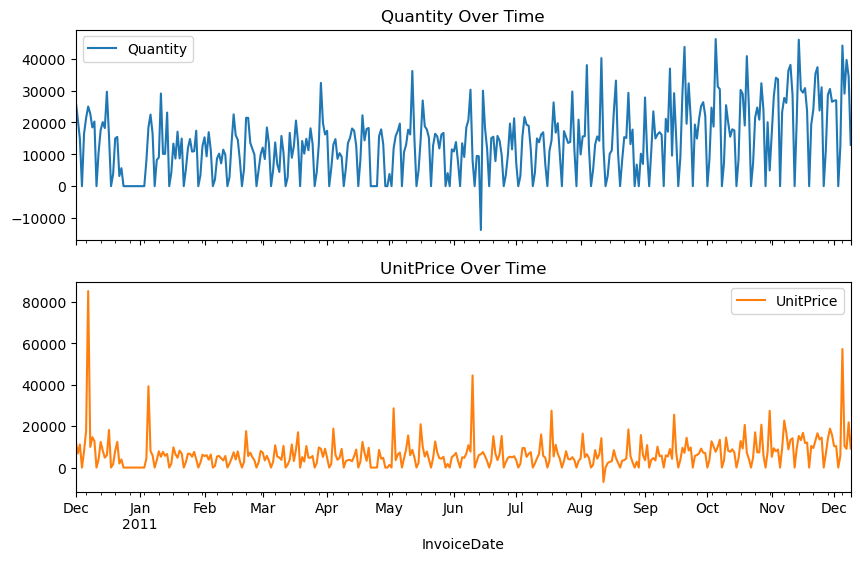

In [35]:
# Time Series Analysis

# We explore the time series for `Quantity` and `UnitPrice` to identify possible patterns.
ts_data.plot(subplots=True, figsize=(10, 6), title=["Quantity Over Time", "UnitPrice Over Time"])
plt.show()

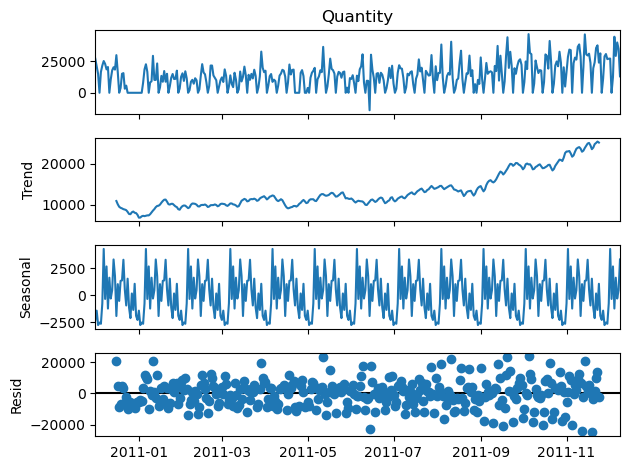

In [36]:
# Time Series Decomposition

# Perform a time series decomposition to observe the seasonal, trend, and residual components.

decomposition_quantity = seasonal_decompose(ts_data['Quantity'], model='additive', period=30)
decomposition_quantity.plot()
plt.show()

In [37]:
# decomposition_price = seasonal_decompose(ts_data['UnitPrice'], model='multiplicative')
# decomposition_price.plot()
# plt.show()

In [38]:
# Stationarity Test

# Perform the augmented Dickey-Fuller test to check the stationarity of the series.
result_quantity = adfuller(ts_data['Quantity'].dropna())
result_price = adfuller(ts_data['UnitPrice'].dropna())

In [39]:
print('ADF Statistic for Quantity:', result_quantity[0])
print('p-value for Quantity:', result_quantity[1])

ADF Statistic for Quantity: -1.7949188223315964
p-value for Quantity: 0.38298725941335293


In [40]:
print('ADF Statistic for UnitPrice:', result_price[0])
print('p-value for UnitPrice:', result_price[1])

ADF Statistic for UnitPrice: -2.431102971218265
p-value for UnitPrice: 0.13314953766463183


In [41]:
# Differencing to Achieve Stationarity

# Differentiate the series to achieve stationarity.
ts_data['Quantity_diff'] = ts_data['Quantity'].diff().dropna()
ts_data['UnitPrice_diff'] = ts_data['UnitPrice'].diff().dropna()

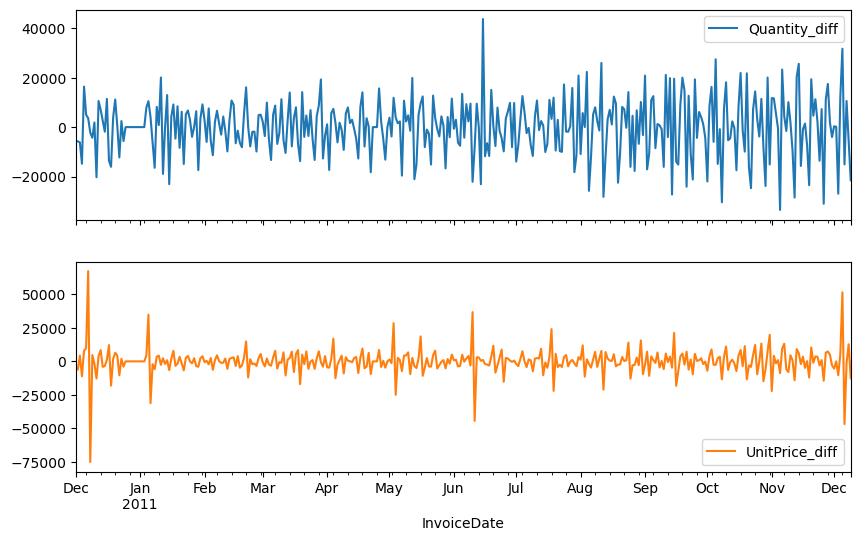

In [42]:
ts_data[['Quantity_diff', 'UnitPrice_diff']].plot(subplots=True, figsize=(10, 6))
plt.show()

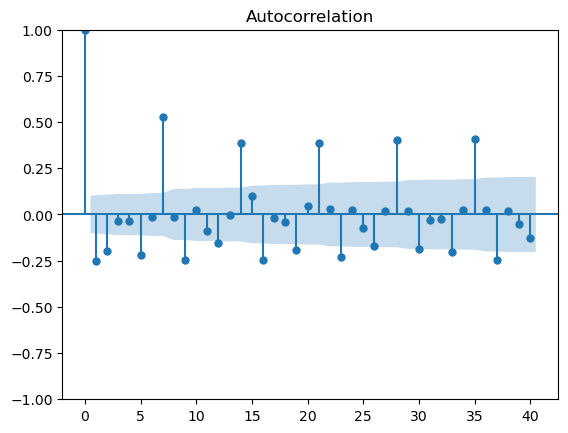

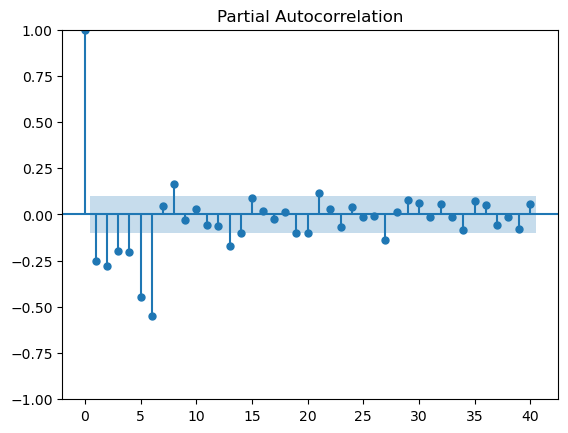

In [43]:
# Identifying Parameters for ARIMA and SARIMAX

# Use the ACF and PACF plots to determine the appropriate p, d, q parameters for the models.
plot_acf(ts_data['Quantity_diff'].dropna(), lags=40)
plt.show()
plot_pacf(ts_data['Quantity_diff'].dropna(), lags=40)
plt.show()

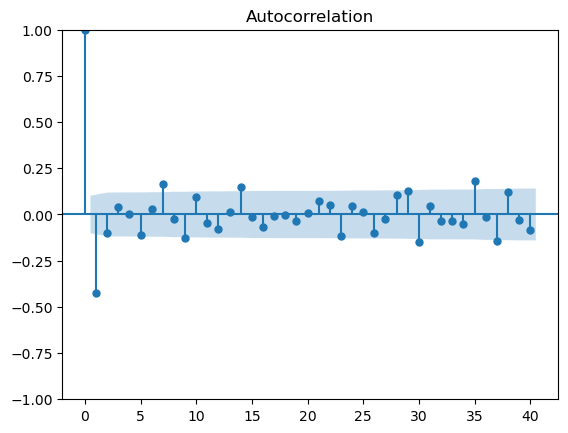

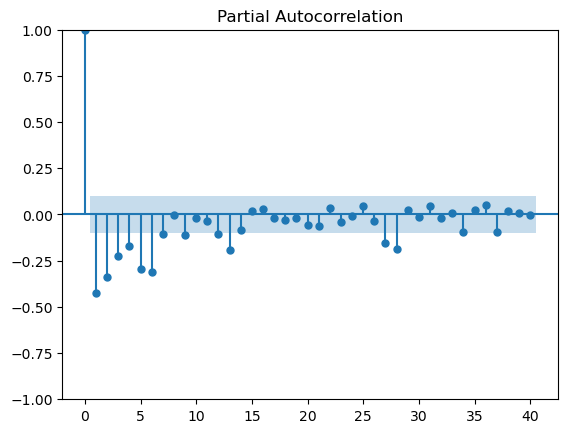

In [44]:
plot_acf(ts_data['UnitPrice_diff'].dropna(), lags=40)
plt.show()
plot_pacf(ts_data['UnitPrice_diff'].dropna(), lags=40)
plt.show()

## ARIMA Model for Quantity

In [45]:
# ARIMA Model for Quantity

# Fit an ARIMA model to the Quantity series and evaluate the predictions.
arima_quantity = ARIMA(ts_data['Quantity'], order=(1, 1, 1)).fit()
forecast_quantity = arima_quantity.forecast(steps=10)
ts_data['ARIMA_Quantity_Predicted'] = arima_quantity.fittedvalues

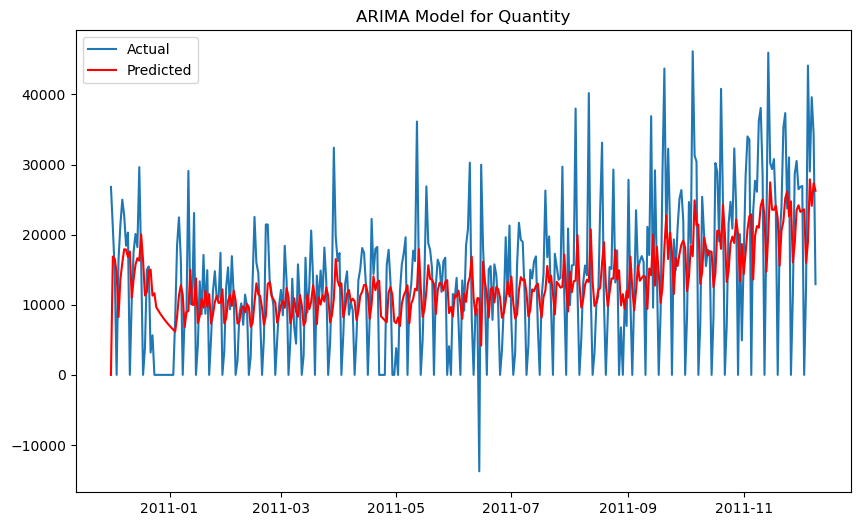

In [46]:
plt.figure(figsize=(10,6))
plt.plot(ts_data.index, ts_data['Quantity'], label='Actual')
plt.plot(ts_data.index, ts_data['ARIMA_Quantity_Predicted'], color='red', label='Predicted')
plt.legend()
plt.title('ARIMA Model for Quantity')
plt.show()

In [47]:
# ARIMA Model Evaluation

# Calculate accuracy metrics for the ARIMA model.
mae_arima = mean_absolute_error(ts_data['Quantity'].dropna(), ts_data['ARIMA_Quantity_Predicted'].dropna())
mse_arima = mean_squared_error(ts_data['Quantity'].dropna(), ts_data['ARIMA_Quantity_Predicted'].dropna())
rmse_arima = sqrt(mse_arima)

In [48]:
# Calculate MAPE for the ARIMA model, ignoring zero actual values to avoid division by zero.
actuals_arima = ts_data['Quantity'].dropna()
predictions_arima = ts_data['ARIMA_Quantity_Predicted'].dropna()
non_zero_actuals_arima = actuals_arima[actuals_arima != 0]
non_zero_predictions_arima = predictions_arima[actuals_arima != 0]
mape_arima = np.mean(np.abs((non_zero_actuals_arima - non_zero_predictions_arima) / non_zero_actuals_arima)) * 100


In [49]:
print('ARIMA Model Evaluation for Quantity:')
print(f'MAE: {mae_arima}')
print(f'MSE: {mse_arima}')
print(f'RMSE: {rmse_arima}')
print(f'MAPE: {mape_arima}%')

ARIMA Model Evaluation for Quantity:
MAE: 7216.902389815691
MSE: 88843071.90809955
RMSE: 9425.660290297945
MAPE: 39.148570219729464%


ARIMA Model Evaluation for Quantity:
- MAE: 7216.902389815691
- MSE: 88843071.90809955
- RMSE: 9425.660290297945
- MAPE: 39.148570219729464%

In [50]:
# SARIMAX Model for UnitPrice

# Fit a SARIMAX model to the UnitPrice series, considering seasonality.
sarimax_price = SARIMAX(ts_data['UnitPrice'].dropna(), order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()
forecast_price = sarimax_price.forecast(steps=10)
ts_data['SARIMAX_UnitPrice_Predicted'] = sarimax_price.fittedvalues

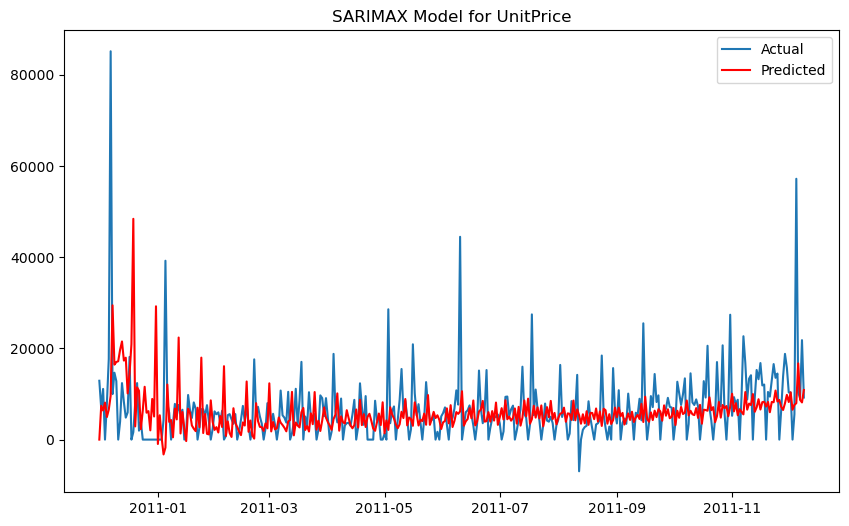

In [51]:
plt.figure(figsize=(10,6))
plt.plot(ts_data.index, ts_data['UnitPrice'], label='Actual')
plt.plot(ts_data.index, ts_data['SARIMAX_UnitPrice_Predicted'], color='red', label='Predicted')
plt.legend()
plt.title('SARIMAX Model for UnitPrice')
plt.show()

In [52]:
# SARIMAX Model Evaluation

# Calculate accuracy metrics for the SARIMAX model.
mae_sarimax = mean_absolute_error(ts_data['UnitPrice'].dropna(), ts_data['SARIMAX_UnitPrice_Predicted'].dropna())
mse_sarimax = mean_squared_error(ts_data['UnitPrice'].dropna(), ts_data['SARIMAX_UnitPrice_Predicted'].dropna())
rmse_sarimax = sqrt(mse_sarimax)

In [53]:
# Calculate MAPE for the SARIMAX model, ignoring zero actual values to avoid division by zero.
actuals_sarimax = ts_data['UnitPrice'].dropna()
predictions_sarimax = ts_data['SARIMAX_UnitPrice_Predicted'].dropna()
non_zero_actuals_sarimax = actuals_sarimax[actuals_sarimax != 0]
non_zero_predictions_sarimax = predictions_sarimax[actuals_sarimax != 0]
mape_sarimax = np.mean(np.abs((non_zero_actuals_sarimax - non_zero_predictions_sarimax) / non_zero_actuals_sarimax)) * 100


In [54]:
print('SARIMAX Model Evaluation for UnitPrice:')
print(f'MAE: {mae_sarimax}')
print(f'MSE: {mse_sarimax}')
print(f'RMSE: {rmse_sarimax}')
print(f'MAPE: {mape_sarimax}%')

SARIMAX Model Evaluation for UnitPrice:
MAE: 5041.15147296018
MSE: 74322658.02873738
RMSE: 8621.058985341499
MAPE: 64.33512418220526%


SARIMAX Model Evaluation for UnitPrice:
- MAE: 5041.15147296018
- MSE: 74322658.02873738
- RMSE: 8621.058985341499
- MAPE: 64.33512418220526%

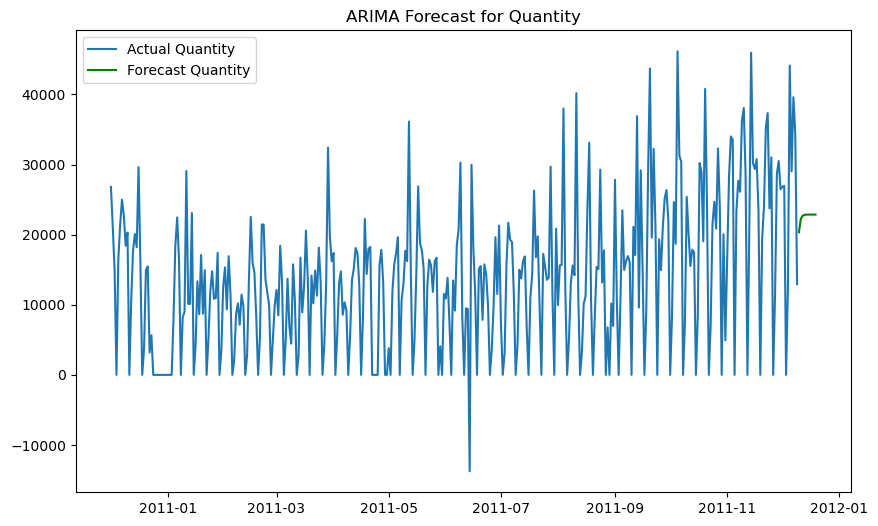

In [55]:
# Future Forecasts

# Generate forecasts for the next 10 days for both Quantity and UnitPrice.
plt.figure(figsize=(10,6))
plt.plot(ts_data.index, ts_data['Quantity'], label='Actual Quantity')
plt.plot(pd.date_range(start=ts_data.index[-1], periods=11, freq='D')[1:], forecast_quantity, color='green', label='Forecast Quantity')
plt.legend()
plt.title('ARIMA Forecast for Quantity')
plt.show()

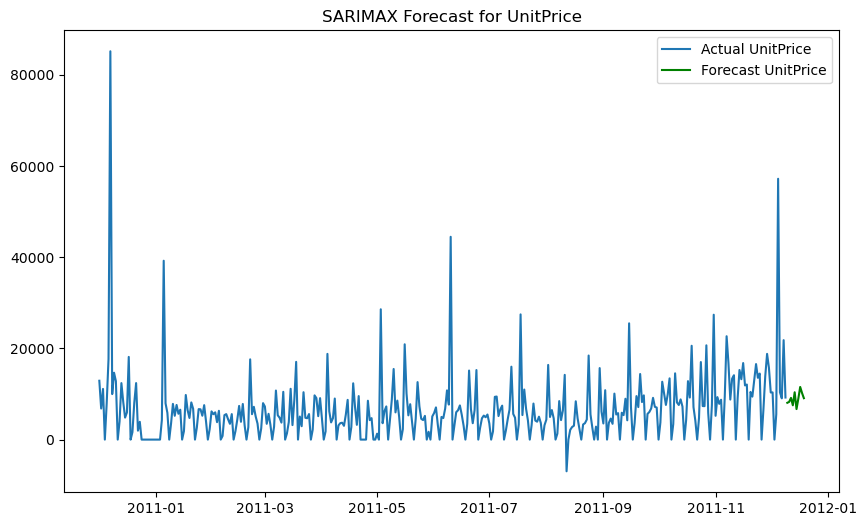

In [56]:
plt.figure(figsize=(10,6))
plt.plot(ts_data.index, ts_data['UnitPrice'], label='Actual UnitPrice')
plt.plot(pd.date_range(start=ts_data.index[-1], periods=11, freq='D')[1:], forecast_price, color='green', label='Forecast UnitPrice')
plt.legend()
plt.title('SARIMAX Forecast for UnitPrice')
plt.show()